# **Sentiment Analysis of Movie Reviews**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load our data set
data = pd.read_csv('IMDB Dataset1.csv')
data.shape

(499, 2)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.tail()

,review,sentiment
494,Despite some reviews being distinctly Luke-war...,positive
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [ ]:
#checking columns in our data
data.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
#checking info our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     499 non-null    object
 1   sentiment  499 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,review,sentiment
count,499,499
unique,499,2
top,One of the other reviewers has mentioned that ...,negative
freq,1,263


In [ ]:
#checking unique values 
data.nunique()

review       499
sentiment      2
dtype: int64

In [ ]:
#checking null values in our data
data.isnull().sum()

review       0
sentiment    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


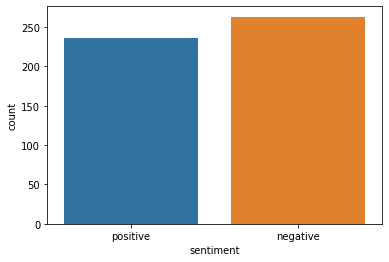

In [ ]:
sns.countplot(data.sentiment)

In [ ]:
data['pred_sentiment']='Neutral'
data

,review,sentiment,pred_sentiment
0,One of the other reviewers has mentioned that ...,positive,Neutral
1,A wonderful little production. <br /><br />The...,positive,Neutral
2,I thought this was a wonderful way to spend ti...,positive,Neutral
3,Basically there's a family where a little boy ...,negative,Neutral
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Neutral
...,...,...,...
494,Despite some reviews being distinctly Luke-war...,positive,Neutral
495,"""American Nightmare"" is officially tied, in my...",negative,Neutral
496,"First off, I have to say that I loved the book...",negative,Neutral
497,This movie was extremely boring. I only laughe...,negative,Neutral


In [ ]:

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [ ]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/PY3/spanish.pickle')

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{"that'll", 'll', 'have', 'after', "couldn't", 'few', 'shouldn', 'above', 'd', "wouldn't", 't', 'just', "she's", 'when', 'yours', 'where', 'o', "doesn't", 'me', 'weren', 'theirs', 'does', 'hadn', 'i', 're', 'should', "needn't", "don't", 'other', 'most', 'you', 'about', 'did', 'in', 'through', 'nor', 'such', 'don', 'her', 'didn', 'until', 'at', 'a', 'being', 'who', 'with', 'our', "you've", 'because', 'which', 'only', 'herself', 'them', 'any', 'his', 'doesn', 'yourself', 'by', 'between', 'some', 'during', 'will', 'again', 'down', 'shan', 'on', 'my', 'of', "hasn't", "you're", 'that', 'once', 'too', 'against', 'out', "wasn't", 'am', 'himself', 'had', 'can', 'these', 'won', 'the', "you'd", 'itself', 'was', 'why', 'wouldn', "weren't", 'been', 'further', 'needn', 'has', "haven't", 'doing', 'from', 'then', "mightn't", 'and', 'more', 'there', 'isn', 'yourselves', 'ma', 'before', 'haven', 'this', 'they', 'aren', "mustn't", 'same', 'as', 'it', 'what', "didn't", 'we', 'she', 'ours', 'is', "it's", 

In [ ]:

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{"that'll", 'll', 'have', 'after', "couldn't", 'few', 'shouldn', 'above', 'd', "wouldn't", 't', 'just', "she's", 'when', 'yours', 'where', 'o', "doesn't", 'me', 'weren', 'theirs', 'does', 'hadn', 'i', 're', 'should', "needn't", "don't", 'other', 'most', 'you', 'about', 'did', 'in', 'through', 'nor', 'such', 'don', 'her', 'didn', 'until', 'at', 'a', 'being', 'who', 'with', 'our', "you've", 'because', 'which', 'only', 'herself', 'them', 'any', 'his', 'doesn', 'yourself', 'by', 'between', 'some', 'during', 'will', 'again', 'down', 'shan', 'on', 'my', 'of', "hasn't", "you're", 'that', 'once', 'too', 'against', 'out', "wasn't", 'am', 'himself', 'had', 'can', 'these', 'won', 'the', "you'd", 'itself', 'was', 'why', 'wouldn', "weren't", 'been', 'further', 'needn', 'has', "haven't", 'doing', 'from', 'then', "mightn't", 'and', 'more', 'there', 'isn', 'yourselves', 'ma', 'before', 'haven', 'this', 'they', 'aren', "mustn't", 'same', 'as', 'it', 'what', "didn't", 'we', 'she', 'ours', 'is', "it's", 

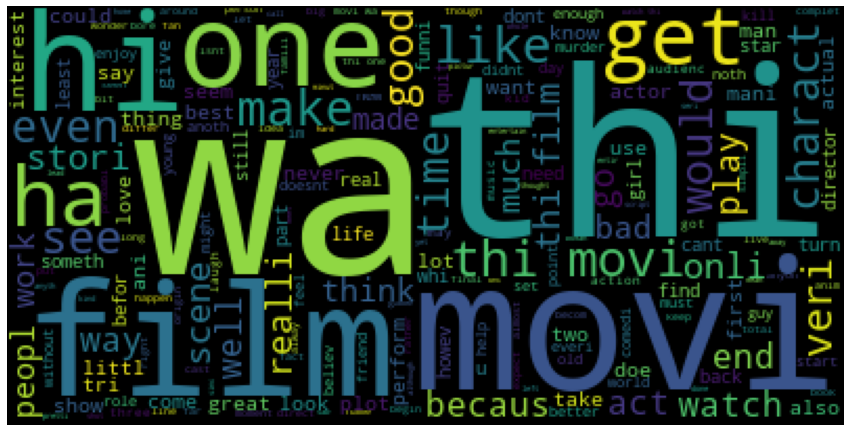

In [ ]:

word_cloud = ""
for row in data['review']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(stopwords=stop,
                      background_color='black',
                     ).generate(word_cloud)
plt.figure(1,figsize=(15, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:

analyzer = SentimentIntensityAnalyzer()

for i in data.index:
    vs = analyzer.polarity_scores(data['review'][i])
    if max(vs, key = vs.get) == 'neg':
        data['pred_sentiment'][i]='negative'
    elif max(vs,key = vs.get) == 'pos':
        data['pred_sentiment'][i]='positive'
    elif max(vs, key = vs.get) == 'neu':
        if data['sentiment'][i] == 'positive':
            data['pred_sentiment'][i]='positive'
        else:
            data['pred_sentiment'][i]='negative'
    elif max(vs, key = vs.get) == 'compound':
        if vs['pos'] > vs['neg']:
            data['pred_sentiment'][i]='positive'
        else:
            data['pred_sentiment'][i]='negative'

data.groupby('pred_sentiment').size()

pred_sentiment
negative    178
positive    321
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


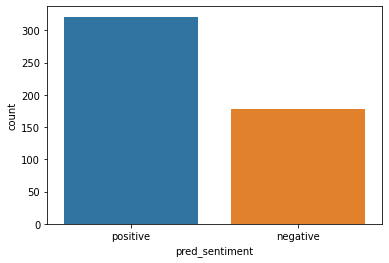

In [ ]:
sns.countplot(data.pred_sentiment)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


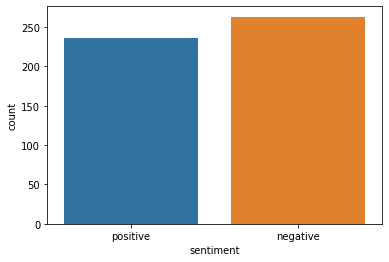

In [ ]:
sns.countplot(data.sentiment)

In [ ]:
print("Predicted Analysis\n",data.groupby('pred_sentiment').size())
print("Given Analysis\n",data.groupby('sentiment').size())
score=accuracy_score(data['sentiment'],data['pred_sentiment'])
print("Accuracy = ",round(score*100,2))

Predicted Analysis
 pred_sentiment
negative    178
positive    321
dtype: int64
Given Analysis
 sentiment
negative    263
positive    236
dtype: int64
Accuracy =  82.97
